In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers import Input
import keras
# create the base pre-trained model



Using TensorFlow backend.


In [2]:
import os
import numpy as np
from keras.applications.inception_v3 import preprocess_input

In [3]:
train_path='D:/machine/keras/classifier/lego-brick-images/LEGO brick images/train'
test_path='D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid'
assert os.path.exists(test_path)
assert os.path.exists(train_path)

In [4]:
input_tensor = Input(shape=(200, 200, 3))
base_model = InceptionV3(input_tensor=input_tensor,weights='imagenet', include_top=False)

In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(16, activation='softmax')(x)

In [6]:
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 99, 99, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 99, 99, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                  vertical_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                 vertical_flip=True)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (200, 200),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=42)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (200, 200),
                                            batch_size = 10,
                                            class_mode = 'categorical',
                                           shuffle=False,
                                           seed=42)

Found 6388 images belonging to 16 classes.
Found 6393 images belonging to 16 classes.


In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
 for layer in base_model.layers[150:]:
    layer.trainable = True

In [11]:
tfboard=keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0,batch_size=10,  
          write_graph=True, write_images=True,update_freq='epoch')
#earlystopping =keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit_generator(
        training_set,
        steps_per_epoch=637,
        epochs=20,
        validation_data=test_set,
        validation_steps=637,
callbacks=[tfboard])

Epoch 1/20
637/637 [==============================] - 154s 243ms/step - loss: 0.8813 - acc: 0.7013 - val_loss: 0.9037 - val_acc: 0.7116
Epoch 2/20
637/637 [==============================] - 133s 209ms/step - loss: 0.3198 - acc: 0.8898 - val_loss: 0.4995 - val_acc: 0.8422
Epoch 3/20
637/637 [==============================] - 132s 207ms/step - loss: 0.2022 - acc: 0.9285 - val_loss: 1.3600 - val_acc: 0.6846
Epoch 4/20
637/637 [==============================] - 133s 209ms/step - loss: 0.1651 - acc: 0.9488 - val_loss: 0.3691 - val_acc: 0.8897
Epoch 5/20
637/637 [==============================] - 134s 211ms/step - loss: 0.1207 - acc: 0.9594 - val_loss: 1.3255 - val_acc: 0.7100
Epoch 6/20
637/637 [==============================] - 132s 207ms/step - loss: 0.1012 - acc: 0.9678 - val_loss: 0.6319 - val_acc: 0.8501
Epoch 7/20
637/637 [==============================] - 132s 207ms/step - loss: 0.0945 - acc: 0.9721 - val_loss: 0.4260 - val_acc: 0.8799
Epoch 8/20
637/637 [============================

In [20]:
training_set.class_indices

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [32]:
model.save_weights("lego_inception_weights.h5")
model.save('lego_inception_model.h5')

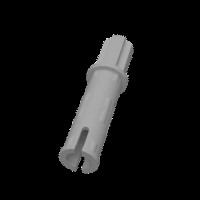

In [23]:
img_path = 'D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid/11214 Bush 3M friction with Cross axle/201706171006-0001.png'
#img_path='D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid/6632 Technic Lever 3M/201706171606-0001.png'
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block0_pool_features = model.predict(x)
img

In [24]:
assert np.argmax(block0_pool_features)==0 #correct class

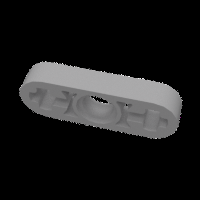

In [25]:
#img_path = 'D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid/11214 Bush 3M friction with Cross axle/201706171006-0001.png'
img_path='D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid/6632 Technic Lever 3M/201706171606-0001.png'
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
img

In [26]:
assert np.argmax(block4_pool_features)==15 #correct class

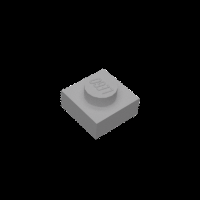

In [28]:

img_path='D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid/3024 Plate 1x1/0009.png'
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block8_pool_features = model.predict(x)
img

In [29]:
assert np.argmax(block8_pool_features)==8 #correct class

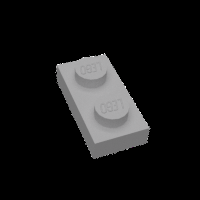

In [30]:
img_path='D:/machine/keras/classifier/lego-brick-images/LEGO brick images/valid/3023 Plate 1x2/0008.png'
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block7_pool_features = model.predict(x)
img

In [31]:
assert np.argmax(block7_pool_features)==7 #correct class